## Observations and Insights 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [121]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [122]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

In [123]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.set_index('Mouse ID')
clean_df = clean_df.drop('g989', axis=0)
clean_df.reset_index(inplace=True)

In [125]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

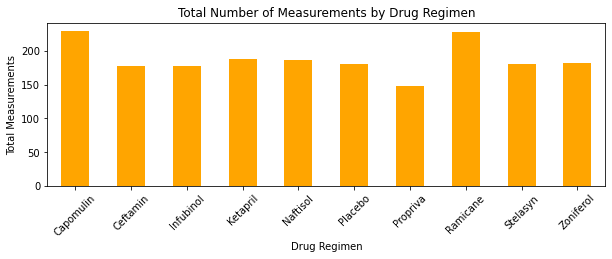

In [128]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_measurements = clean_df.groupby('Drug Regimen').count()
tot_measurements.rename(columns= {'Tumor Volume (mm3)': 'Total Measurements'}, inplace=True)
measurement_bar = tot_measurements['Total Measurements']
measurement_bar = measurement_bar.plot(kind='bar', figsize=(10,3), facecolor='orange', rot=45, title='Total Number of Measurements by Drug Regimen')
measurement_bar.set_ylabel('Total Measurements')


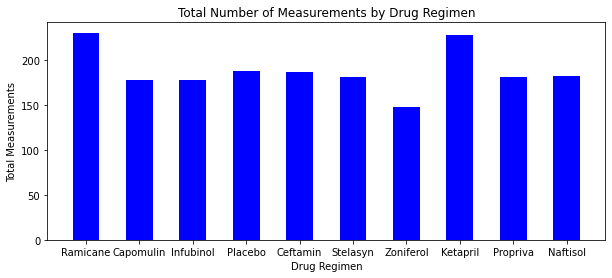

In [145]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = clean_df['Drug Regimen'].value_counts()
regimen2 = clean_df.drop_duplicates(['Drug Regimen'], keep='first')
regimen_list = regimen2['Drug Regimen'].tolist()
x_axis = np.arange(len(regimen))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, tot_measurements['Total Measurements'], color="b", width=.5)
plt.xticks(tick_locations, regimen_list)
plt.title('Total Number of Measurements by Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9F1230160>],
      dtype=object)

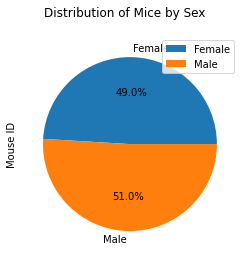

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df[['Mouse ID', 'Sex']]
gender_group = gender_df.groupby(['Sex']).count()
gender_group.plot(kind='pie', subplots=True, autopct='%1.1f%%', title='Distribution of Mice by Sex')

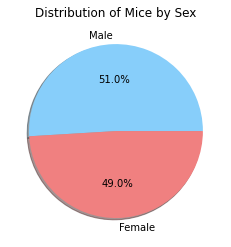

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df['Sex'].value_counts()
sex2 = clean_df.drop_duplicates(['Sex'], keep='first')
labels = sex2['Sex']
sizes = clean_df['Sex'].value_counts().tolist()
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Mice by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby(['Mouse ID']).max()
last_timepoint_df2 = pd.DataFrame(last_timepoint_df['Timepoint'])
last_timepoint_df2
    

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_merge = pd.merge(clean_df, last_timepoint_df2, on='Mouse ID')
last_timepoint_merge.rename(columns= {'Timepoint_y': 'Max Timepoint'}, inplace=True)
last_timepoint_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Last Timepoint,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN,45
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN,45


In [214]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for reg in treatment: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol_tumor = last_timepoint_merge.loc[last_timepoint_merge['Drug Regimen']== reg]['Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(vol_tumor)
    quartiles = vol_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = vol_tumor.loc[(vol_tumor < lower_bound) | (vol_tumor > upper_bound)]
    print(reg, outlier)

Capomulin 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

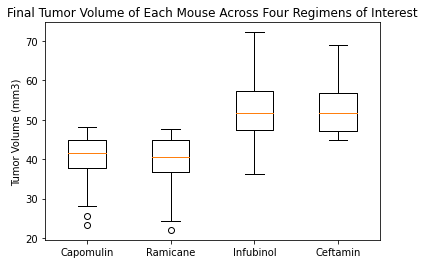

In [215]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(vol_data, labels= treatment)
plt.show

## Line and Scatter Plots

In [221]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# set index to Drug Regimen and sort ascending to identify and select a mouse treated with Capomulin
drug_index = clean_df.set_index('Drug Regimen')
drug_index.sort_values('Drug Regimen', ascending=True)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
Drug Regimen,,,,,,,,
Capomulin,v923,Female,19,21,30,40.752216,2,NaN
Capomulin,g316,Female,22,22,35,44.702833,2,NaN
Capomulin,g316,Female,22,22,30,44.221480,2,NaN
Capomulin,g316,Female,22,22,25,46.809225,1,NaN
Capomulin,g316,Female,22,22,20,45.933322,1,NaN
...,...,...,...,...,...,...,...,...
Zoniferol,o926,Male,15,29,40,59.903044,3,NaN
Zoniferol,o926,Male,15,29,35,58.593993,3,NaN
Zoniferol,o926,Male,15,29,30,56.917398,3,NaN


In [222]:
# create new dataframe for selected mouse
mouse_df = clean_df.loc[clean_df['Mouse ID'] == 'g316']
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
351,g316,Capomulin,Female,22,22,0,45.000000,0,NaN
352,g316,Capomulin,Female,22,22,5,44.022752,0,NaN
353,g316,Capomulin,Female,22,22,10,44.502042,0,NaN
354,g316,Capomulin,Female,22,22,15,45.216743,0,NaN
355,g316,Capomulin,Female,22,22,20,45.933322,1,NaN
356,g316,Capomulin,Female,22,22,25,46.809225,1,NaN
357,g316,Capomulin,Female,22,22,30,44.221480,2,NaN
358,g316,Capomulin,Female,22,22,35,44.702833,2,NaN
359,g316,Capomulin,Female,22,22,40,45.565821,2,NaN
360,g316,Capomulin,Female,22,22,45,40.159220,2,NaN


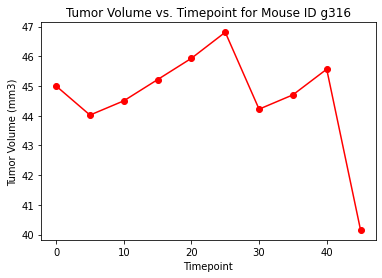

In [223]:
#create line plot 
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='r')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse ID g316')
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
